# Hierarchical Clustering

Hierarchical clustering is a type of unsupervised machine learning algorithm used to cluster unlabeled data points. Like K-means clustering, hierarchical clustering also groups together the data points with similar characteristics. 

There are two types of hierarchical clustering: Agglomerative and Divisive. In the former, data points are clustered using a bottom-up approach starting with individual data points, while in the latter top-down approach is followed where all the data points are treated as one big cluster and the clustering process involves dividing the one big cluster into several small clusters.

### Steps for agglomerative clustering

1. Treat each data point as one cluster. Therefore, the number of clusters at the start will be K, while K is an integer   representing the number of data points.
2. Form a cluster by joining the two closest data points resulting in K-1 clusters.
3. Form more clusters by joining the two closest clusters resulting in K-2 clusters.
4. Repeat the above three steps until one big cluster is formed.
5. Once single cluster is formed, dendrograms are used to divide into multiple clusters depending upon the problem.

### Useful libraries

    To load dataset:    import pandas as pd
    Preprocessing:      from sklearn import preprocessing
    ploting graph:      import matplotlib.pyplot as plt
    numpy:              import numpy as np
    Agglomerative:      from sklearn.cluster import AgglomerativeClustering
    dendograms:         import scipy.cluster.hierarchy as shc
    for evaluations:    from sklearn import metrics
    plot the graph:     %matplotlib inline

### Load the "s1_modified " data

In [1]:
# import the libraries
import pandas as pd
from sklearn import preprocessing
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as shc

In [2]:
#load the dataset
df = pd.read_csv("s1_modified.csv")
print(df)

           x       y
0     664159  550946
1     665845  557965
2     597173  575538
3     618600  551446
4     635690  608046
...      ...     ...
4995  665426  853940
4996  691827  863963
4997  650661  861267
4998  599647  858702
4999  684091  842566

[5000 rows x 2 columns]


### Q1. Perform pre-processing (if required)

In [3]:
# preprocessing
X = df.values # the data points
scaler = preprocessing.MinMaxScaler(feature_range=(0,1))
X = scaler.fit_transform(X)
print(X)

[[0.68391154 0.54350367]
 [0.68570112 0.55113605]
 [0.61280989 0.57024472]
 ...
 [0.66958421 0.88094298]
 [0.61543589 0.87815383]
 [0.70506817 0.86060774]]


### Q2. Apply agglomerative clustering with single link

In [19]:
clustering = AgglomerativeClustering(linkage = "single").fit(X)

### Q3. Plot the clusters

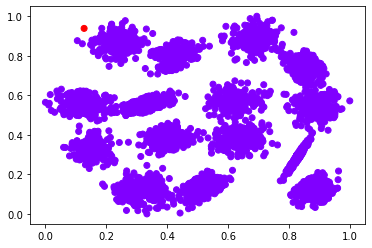

In [20]:
plt.scatter(X[:,0], X[:,1] ,
           c = clustering.labels_, cmap ='rainbow')
plt.show()

### Q4. Plot the dendograms using single link clustering

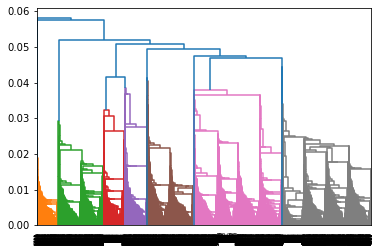

In [21]:
dn = shc.dendrogram(shc.linkage(X, "single"))

### Q5. What is the threshold where you will cut the dendograms and what are the natural number of clusters

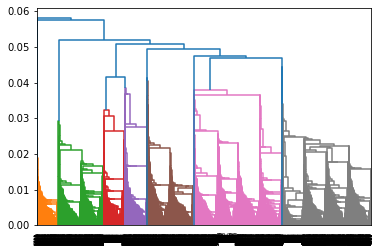

In [22]:
# Plot the dendograms for three levels only
dn = shc.dendrogram(shc.linkage(X, "single"), p = 3)
# number of clusters = 7

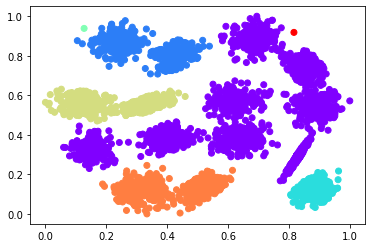

In [23]:
clustering = AgglomerativeClustering(linkage = "single", n_clusters = 7).fit(X)
plt.scatter(X[:,0], X[:,1] ,
           c = clustering.labels_, cmap ='rainbow')
plt.show()

### Q6. Apply agglomerative clustering using complete link and find the natural number of clusters by ploting dendograms

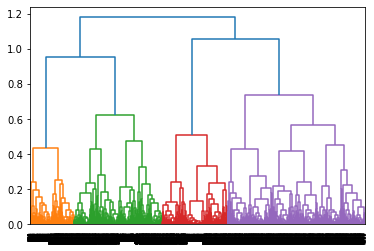

In [24]:
dn = shc.dendrogram(shc.linkage(X, "complete"))

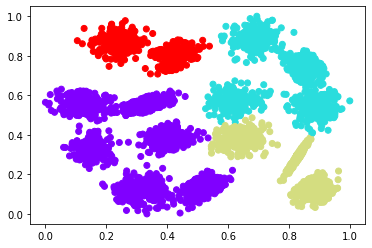

In [26]:
# number of clusters = 4
clustering = AgglomerativeClustering(linkage = "complete", n_clusters = 4).fit(X)
plt.scatter(X[:,0], X[:,1] ,
           c = clustering.labels_, cmap ='rainbow')
plt.show()

### Q7. Repeat the process for wards method to find the natural number of clusters by ploting dendograms

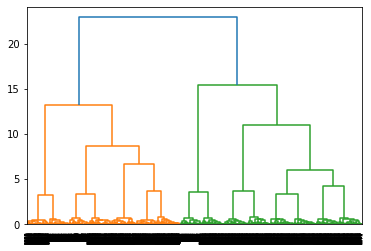

In [27]:
dn = shc.dendrogram(shc.linkage(X, "ward"))

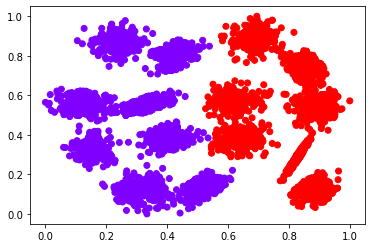

In [28]:
# number of clusters = 2
clustering = AgglomerativeClustering(linkage = "ward").fit(X)
plt.scatter(X[:,0], X[:,1] ,
           c = clustering.labels_, cmap ='rainbow')
plt.show()